### Robustness check over Syrinx-based performance landscapes

This script conducts multiple simulations, across RL noise levels, and generates summary statistics.

In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt                            
from ipynb.fs.full.DualPathwayModel import Model as Model
import os
from matplotlib import patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Parameters

perf_threshold = 0.6                   # Success threshold
n_global_optima = 3                    # 1 for Gaussian-based landscapes and 3 for Syrinx-based landscapes

nrpd = 100                             # No. of simulations per scenario
n_repeat = nrpd + 1

nd = 60                                # No. of days in simulation
lr = 0.1                               # Learning rate of simulation
ntpd = 1000                            # No. of trials per day of simulation

noiseVal = [0.2, 0.3, 0.4, 0.5]        # RL noise levels to be tested

Fig_path = 'ModelwSyrinx_' + str(nd) + 'd_0' + str(int(lr*100)) +'eta/'

In [3]:
overall_rseed = 1000
np.random.seed(overall_rseed)

rseeds = np.random.randint(0, 1e9, size=n_repeat)

# Stores performance metrics of each simulation
Performance = {}
Performance['rseeds'] = rseeds 

Uncomment following cell to generate several simulations on the Syrinx based performance landscapes.

Leave it commented if the simulations have already been run previously and the corresponding Performance.npy is available.

In [4]:
# # Conducts batch simulations over all specified scenarios and saves corresponding performance metrics

# for noiseLim in noiseVal:
#     fig_path = Fig_path + 'Noise_0'+ str(int(noiseLim*100)) + '/'

#     if not os.path.isdir(fig_path):
#         os.makedirs(fig_path, exist_ok=False)
#     else:
#         print(fig_path + " already exists.")
    
#     Ravg = np.zeros(rseeds.size)
#     Davg = np.zeros((rseeds.size, n_global_optima))    # Hard-coded no. of global optima
#     Npeaks = np.zeros(rseeds.size)

#     distractor = 10 #(run//nrpd + 1) * 10
#     for run, rseed in enumerate(rseeds[:-1]):
#         state_file = fig_path+ str(run) + '_' + str(rseed) + '_' + str(distractor) + '_object_variables.npy'
#         if os.path.isfile(state_file):
#             print("retrieving ", state_file)
#             stored_state=(np.load(state_file)).item()
#             Ravg[run], Davg[run], Npeaks[run] = stored_state['performance_metric']
#         else:
#             ModelObj = Model(rseed, run, distractor, noiseLim, fig_path, eta=lr, n_days=nd, ntrialspday=ntpd, simulation=True, contour_type='Syrinx')
#             Ravg[run], Davg[run], Npeaks[run] = ModelObj.simulate()
#             # ModelObj.plot_results()       # Uncomment if you wish to generate plots for individual simulations

#     run = n_repeat-1
#     rseeds[run] = 3456
#     rseed = 3456
#     state_file = fig_path+ str(run) + '_' + str(rseed) + '_' + str(distractor) + '_object_variables.npy'
#     if os.path.isfile(state_file):
#         stored_state=(np.load(state_file)).item()
#         Ravg[run], Davg[run], Npeaks[run] = stored_state['performance_metric']
#     else:
#         ModelObj = Model(rseed, run, distractor, noiseLim, fig_path, eta=lr, n_days=nd, ntrialspday=ntpd, simulation=True, contour_type='Syrinx')
#         Ravg[run], Davg[run], Npeaks[run] = ModelObj.simulate()
            
    

#     Performance[noiseLim*100] = {}
#     Performance[noiseLim*100]['RewardPerf'] = Ravg
#     Performance[noiseLim*100]['DistancePerf'] = Davg
#     Performance[noiseLim*100]['Npeaks'] = Npeaks

# np.save(Fig_path + 'Performance', Performance)

In [5]:
# Loads performance metrics of previously generated simulations
# From here on, the script requires a file ModelwSyrinx_60d_010eta/Performance.npy generated by the previous cell.

Performance = np.load(Fig_path + 'Performance.npy').item()

Text(0.5, 0.98, 'Syrinx contour')

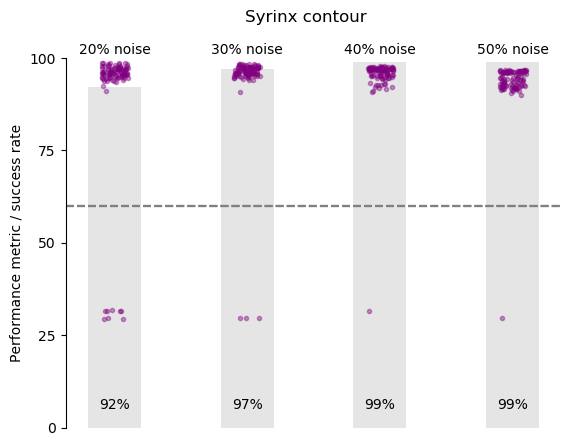

In [6]:
# Plots summary figure of performance metrics across noise levels.

figure, ax = plt.subplots(1, 1)
# if n_distractors == 1: ax = [ax]

for k, noiseLim in enumerate(noiseVal):
    PerfMetric = Performance[noiseLim*100]['RewardPerf']
    Perf_x = np.ones(nrpd)*(k+1)*10 + np.random.uniform(-1,1,nrpd)
    ax.plot(Perf_x, PerfMetric[:nrpd]*100, lw=0, marker='.', color='purple', alpha=0.4)
    p = np.sum(PerfMetric[:nrpd]>perf_threshold) * 100 / nrpd
    ax.bar((k+1)*10, p, width=4, color='grey', alpha=0.2)
    ax.text((k+1)*10, 101, str(int(noiseLim*100))+"% noise", color='black', ha='center')
    ax.text((k+1)*10, 5, str(int(p)) + '%', color='black', ha='center')

    ax.axhline(y=perf_threshold*100, color='grey', linestyle='--')

    ax.set_ylim(0,100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_ylabel('Performance metric / success rate')
ax.get_yaxis().set_ticks([0, 25, 50, 75, 100])
ax.get_xaxis().set_ticks([])

figure.suptitle('Syrinx contour')

# plt.savefig(Fig_path + 'Overall_syrinx_vs_noise.png')